# Abalone Age Prediction Sequential Model TensorFlow
 Generally, the age of an Abalone is determined by the physical examination of the abalone but this is a tedious task which is why we will try to build a regressor that can predict the age of abalone using some features which are easy to determine.
 ## Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [65]:
data = pd.read_csv("drive/MyDrive/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
# Shape
data.shape

(4177, 9)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


## Exploratory Data Analysis

In [69]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Distribution of the data in male, female and infant

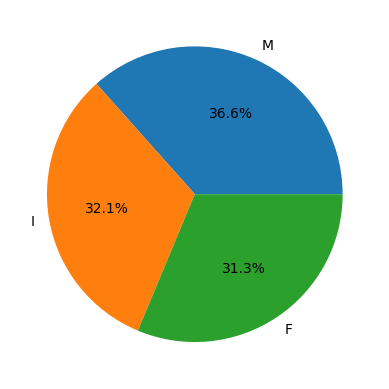

In [70]:
x = data['Sex'].value_counts()
labels = x.index
values = x.values
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.show()

by the look of the above the pie chat shows that we have equal amount of data for male, female, and infant abalone

In [71]:
data.groupby('Sex').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


Here is an interesting observation that the life expectancy of the female abalone is higher than that of the male abalone. In the other features as well we can see that the height weight, as well as length in all the attributes of the numbers for female abalones, is on the higher sides.

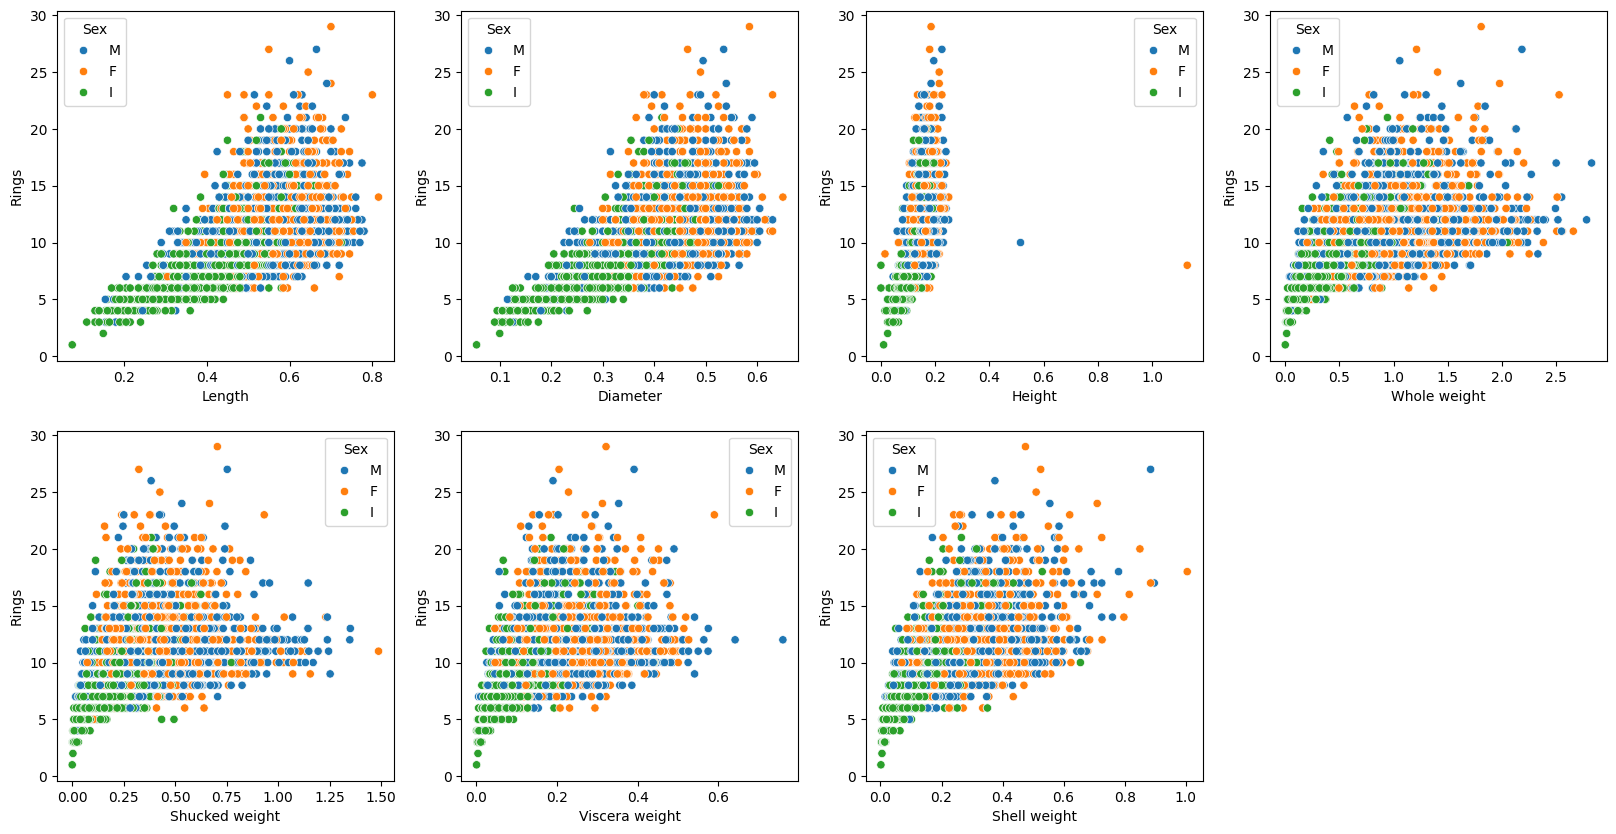

In [72]:
features = data.loc[:, 'Length':'Shell weight'].columns
plt.subplots(figsize=(20,10))
for i, feat in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.scatterplot(data = data, x = feat, y='Rings', hue = 'Sex')

plt.show()

Observations from the above graph are as follows:

 - A strong linear correlation between the age of the abalone and its height can be observed from the above graphs.

 - Length and Diameter have the same kind of relation with age that is up to a certain age length increases and after that it became constant.

 A similar kind of relationship is present between the weight and the age feature.

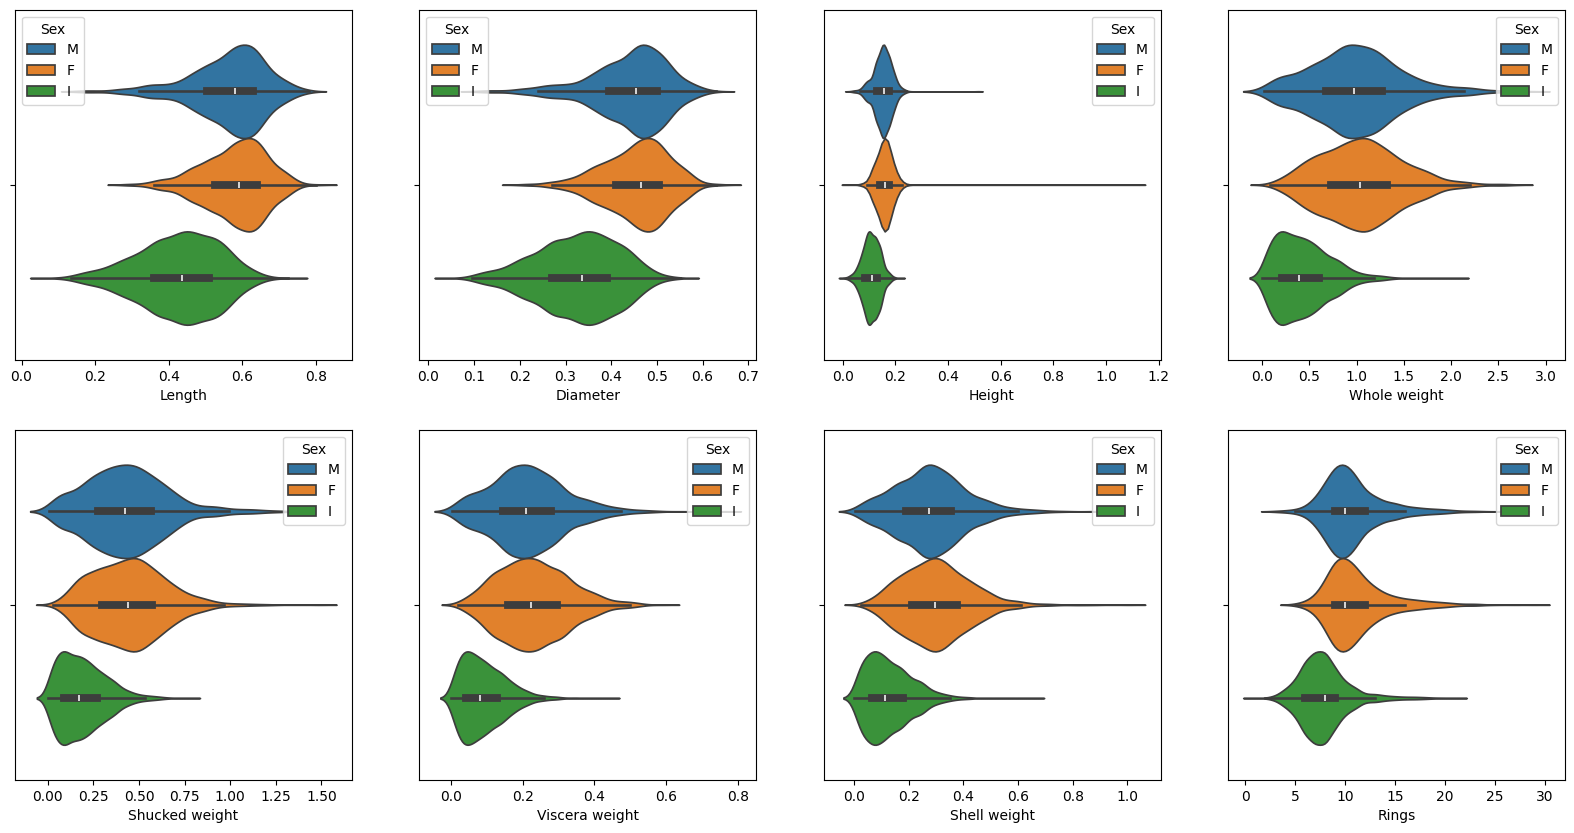

In [73]:
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.violinplot(data = data, x = feat , hue ='Sex')

plt.subplot(2, 4, 8)
sns.violinplot(data = data, x = 'Rings', hue = 'Sex')
plt.show()

In [74]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Perform a One Hot Encoding on the Sex column.

In [75]:
data = pd.get_dummies(data, columns=['Sex'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


Now I will separate the Features and target variables and split them into training and validation data.

In [76]:
features = data.drop('Rings', axis = 1)
target = data['Rings']
t='BY JosephWathome'
X_train,X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2,
                                                 random_state = 22)

X_train.shape, X_val.shape

((3341, 10), (836, 10))

In [77]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
3733,0.605,0.455,0.160,1.1215,0.5330,0.2730,0.2710,0,0,1
3505,0.625,0.495,0.180,1.0815,0.4715,0.2540,0.3135,0,0,1
3314,0.450,0.355,0.115,0.4385,0.1840,0.1080,0.1125,0,1,0
1888,0.565,0.445,0.125,0.8305,0.3135,0.1785,0.2300,1,0,0
3484,0.475,0.420,0.160,0.7095,0.3500,0.1505,0.1845,0,1,0


## Model Architecture
I will impliment the **Sequential Model** that will contain the following parts:
 - I will have Tow Connected Layers
 - I have included some **BatchNormalization** layers to enable stable and fast training and a **Dropout** layer before the final layer to avoid any possibility of overfitting.

In [78]:
model = keras.Sequential([layers.Dense(256, activation = 'relu', input_shape = [10]),
                          layers.BatchNormalization(),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1, activation='relu')])

model.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = ['mape'])

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 1)                

converting the data to foat32 for the model

In [80]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_val = X_val.astype('float32')
Y_val = Y_val.astype('float32')


## Model Training

In [81]:
history = model.fit(X_train, Y_train,
                    epochs=50,
                    verbose=1,
                    batch_size=64,
                    validation_data=(X_val, Y_val))

Epoch 1/50
53/53 [==============================] - 2s 17ms/step - loss: 5.2891 - mape: 57.2654 - val_loss: 7.8946 - val_mape: 79.3217
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 4.1686 - mape: 47.0963 - val_loss: 7.1025 - val_mape: 71.5404
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 4.0295 - mape: 45.9125 - val_loss: 6.1870 - val_mape: 62.5931
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 3.9076 - mape: 44.6869 - val_loss: 5.1261 - val_mape: 51.8713
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 3.3706 - mape: 38.6901 - val_loss: 1.8799 - val_mape: 16.3903
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 2.7900 - mape: 31.8521 - val_loss: 1.8729 - val_mape: 19.3113
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 2.4032 - mape: 26.8200 - val_loss: 2.1171 - val_mape: 23.3601
Epoch 8/50
53/53 [==============================] - 0s 7ms/st

In [82]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,mape,val_loss,val_mape
0,5.289099,57.265411,7.894604,79.321724
1,4.168559,47.096336,7.102536,71.540443
2,4.029542,45.912514,6.187005,62.593052
3,3.907557,44.686943,5.126121,51.871315
4,3.370569,38.690086,1.879891,16.390261


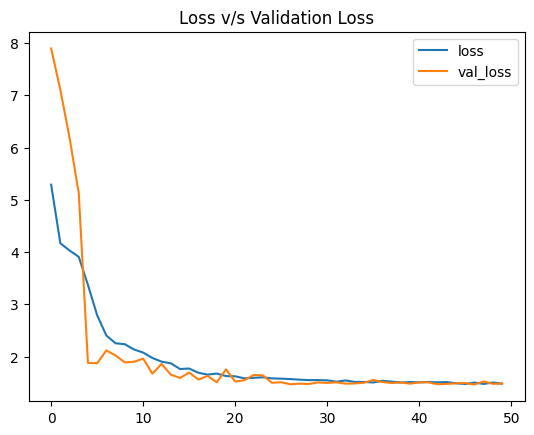

In [83]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

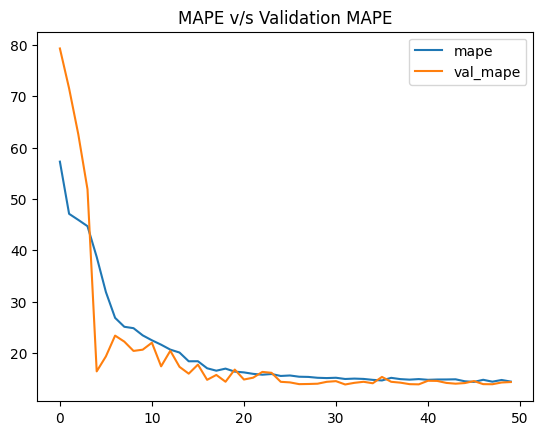

In [84]:
hist_df['mape'].plot()
hist_df['val_mape'].plot()
plt.title('MAPE v/s Validation MAPE')
plt.legend()
plt.show()

From the above two graphs, we can certainly say that the two(mae and mape) error values have decreased simultaneously and continuously. Also, the saturation has been achieved after 15 epochs only.

By Joseph Wathome

In [85]:
print(t)

BY JosephWathome
